In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import seaborn as sns
import scipy.sparse as sp
import scipy.linalg as la
import time
import argparse
import re
import warnings
import statsmodels
from statsmodels.nonparametric.smoothers_lowess import lowess
import streamlit as st
import os
from os import listdir
from PIL import Image
import matplotlib.image as mpimg

warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


I woke up too late today, must be the sun


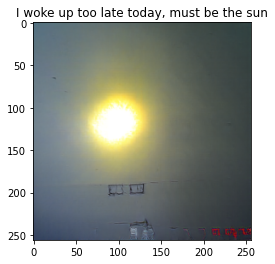

Aint got a fortune and I cant pretend to give


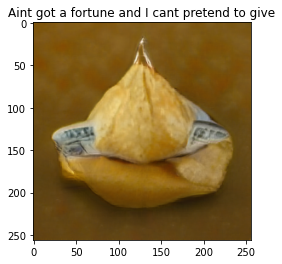

A little bit of greed mixed with some hard liquor


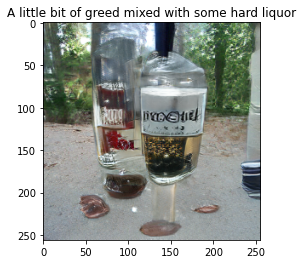

Some dogma thatll brainwash your world picture


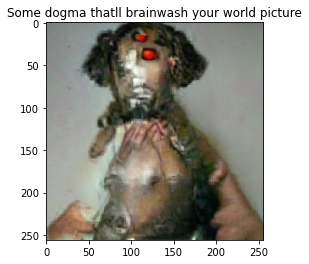

And a shock when you get mocked at the job you hate


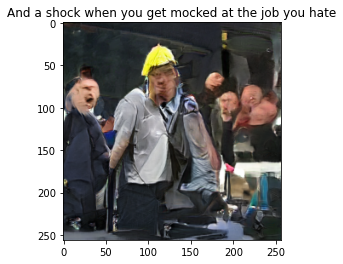

By the boss when you’re not co-operating


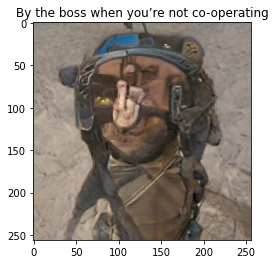

Cause youre not giving up while the world is shaking!


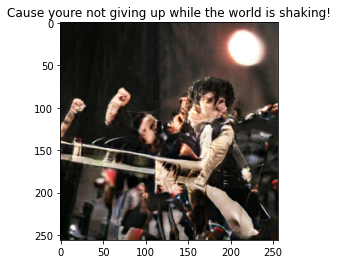

You waited this long, now stop debating


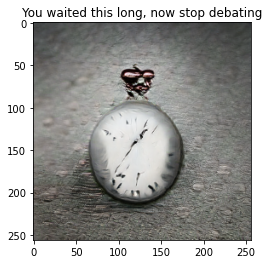

Cause we are back on the streets and demonstrating


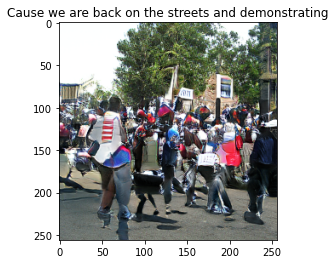

I know that you got a job, Ms. Teacher


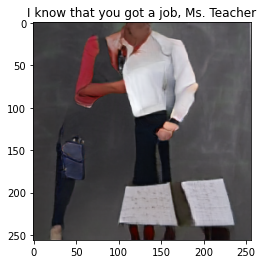

But our planets health problems complicating!


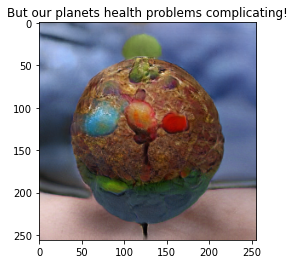

So the NDCs and SDGs


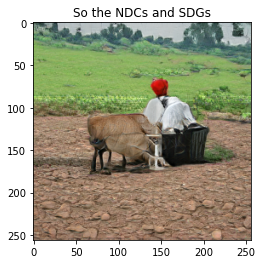

Are technically our last chance to keep


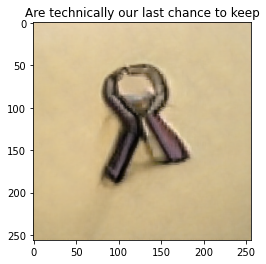

Global warming below 1.5 degrees


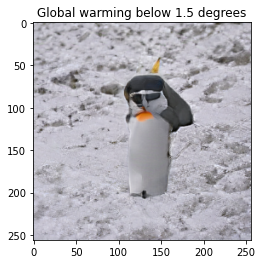

So Id say Lets take to the streets


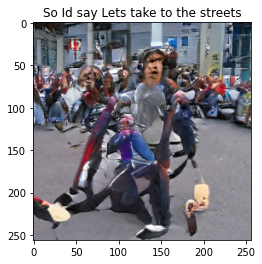

So call all your friends, tell em to dance


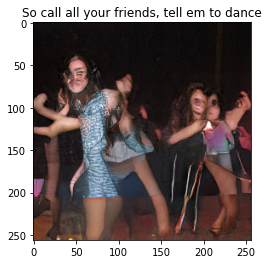

Cut t


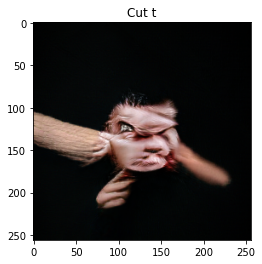

And get ready, cause this shits about to get heavy


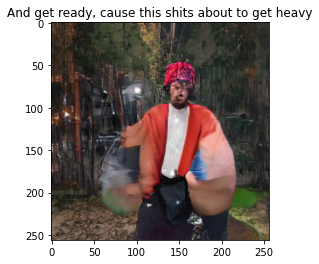

They be stealing our future


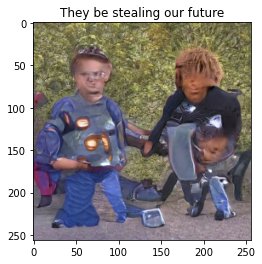

In [209]:
data_n = None
path_prefix = "../10615/Assignments/project4/film3"
movie = []
titles = []
for file in listdir(path_prefix):
    img = mpimg.imread(os.path.join(path_prefix,file))
#     img =  img.resize((256, 256, 3), Image.ANTIALIAS)
#     plt.title(titles[int(i/90)])
    title = file.split("- ")[1][:-4]
    titles.append(title)
    print(title)
    plt.title(title)
#     plt.title(file.split("- ")[1].rstrip(".png"))
#     plt.savefig(img,)
    movie.append(img)
    imgplot = plt.imshow(img)
    plt.show()

In [197]:
len(movie)

19

In [198]:
[(i+1, movie[i].shape) for i in range(len(movie))]

[(1, (256, 256, 3)),
 (2, (256, 256, 3)),
 (3, (256, 256, 3)),
 (4, (256, 256, 3)),
 (5, (256, 256, 3)),
 (6, (256, 256, 3)),
 (7, (256, 256, 3)),
 (8, (256, 256, 3)),
 (9, (256, 256, 3)),
 (10, (256, 256, 3)),
 (11, (256, 256, 3)),
 (12, (256, 256, 3)),
 (13, (256, 256, 3)),
 (14, (256, 256, 3)),
 (15, (256, 256, 3)),
 (16, (256, 256, 3)),
 (17, (256, 256, 3)),
 (18, (256, 256, 3)),
 (19, (256, 256, 3))]

In [201]:
final_movie = []
# for k in range(len(movie)-1):
for k in range(4):
    movie_0 = movie[k]
    movie_1 = movie[k+1]
    print("K is ", k)
    for i in range(90):
        if i < 10:
            alpha = 0
        else:
            alpha = (i-9)/80
        temp =  alpha*movie_1 + (1- alpha)*movie_0
        final_movie.append(temp)
#         temp_plot = plt.imshow(temp)
#         plt.show()
    
    
    
    
# Image[t]=alpha[t]*image1+(1-alpha[t]*image2
# Make alpha[t] change in for loop between 0 and 1

K is  0
K is  1
K is  2
K is  3


In [202]:
len(final_movie)

360

In [203]:
2070/99

20.90909090909091

In [204]:
# muse - 60 sec
# bobdylan - 99 sec
# eminem - 60 sec

2022-05-02 01:44:34.511 INFO    matplotlib.animation: Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2022-05-02 01:44:34.512 INFO    matplotlib.animation: MovieWriter._run: running command: ../10615/ffmpeg-2022-04-28-git-ec07b15477-essentials_build/ffmpeg-2022-04-28-git-ec07b15477-essentials_build/bin/ffmpeg.exe -f rawvideo -vcodec rawvideo -s 432x288 -pix_fmt rgba -r 30 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y eminem_titles.mp4


<Figure size 432x288 with 0 Axes>

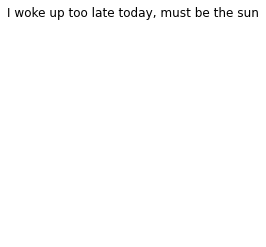

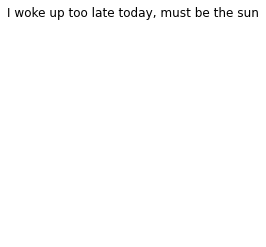

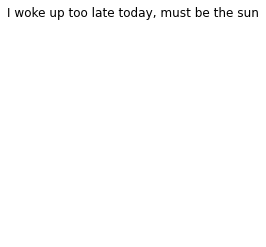

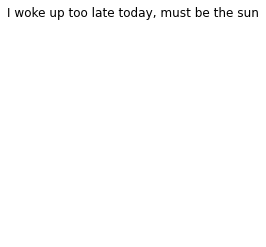

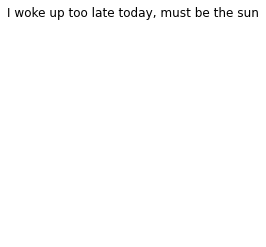

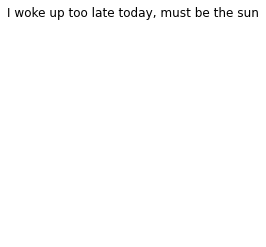

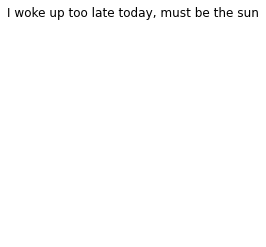

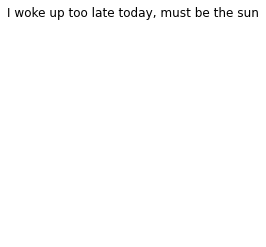

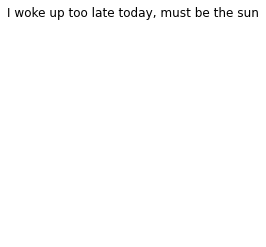

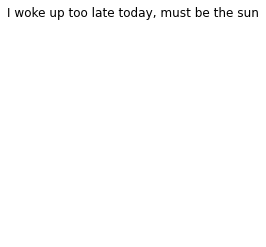

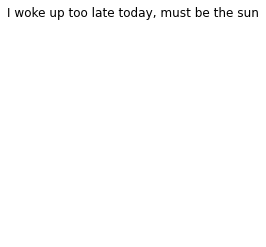

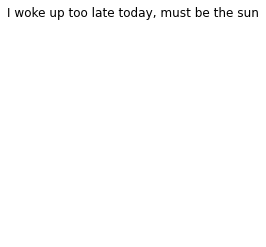

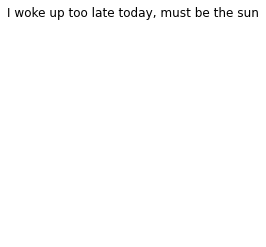

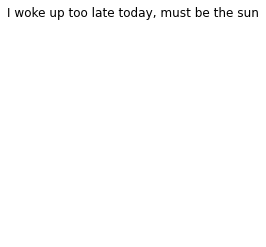

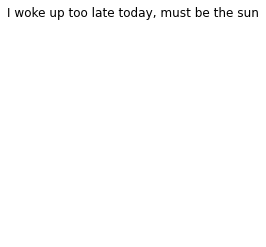

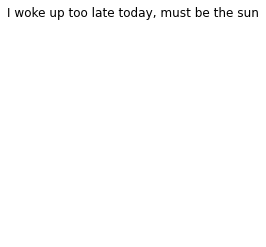

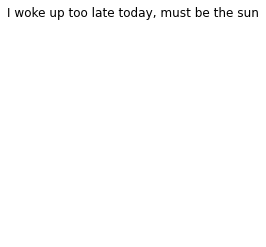

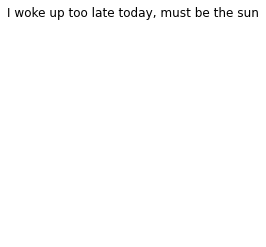

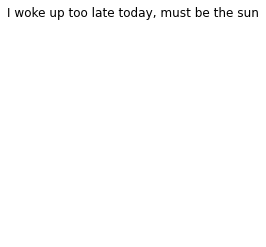

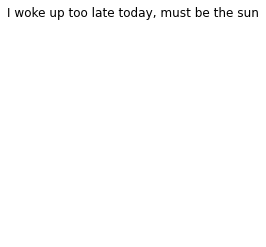

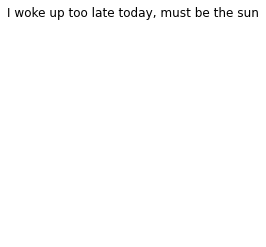

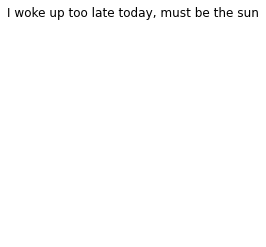

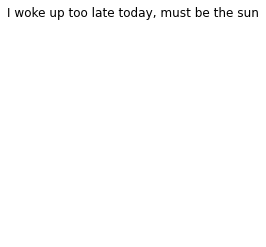

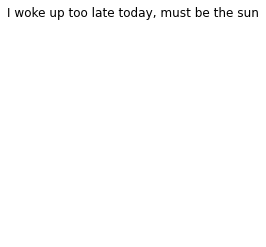

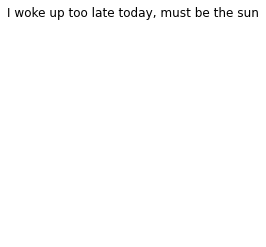

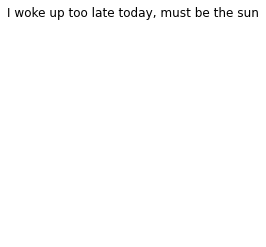

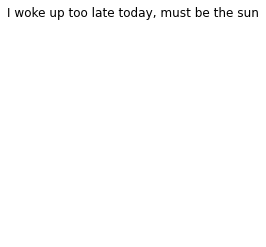

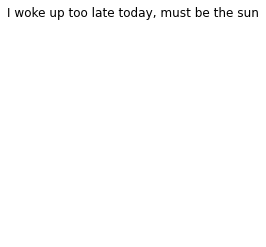

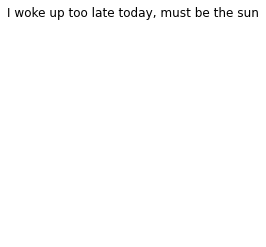

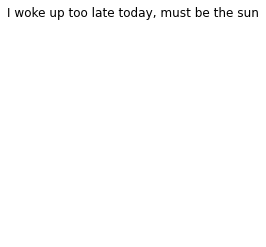

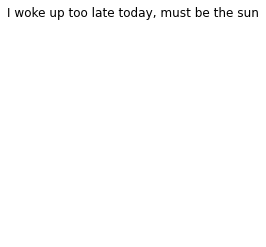

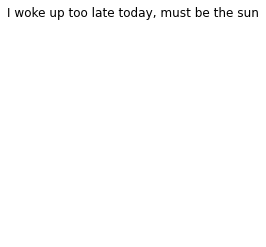

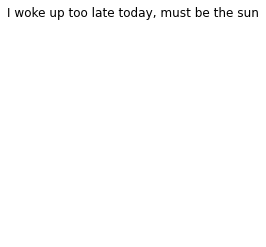

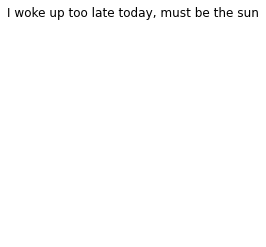

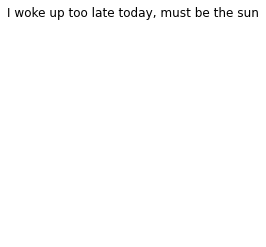

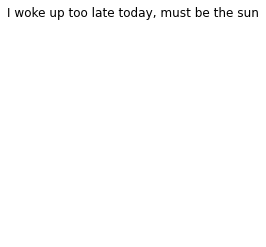

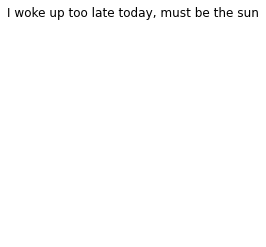

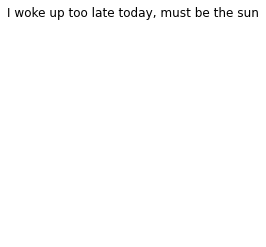

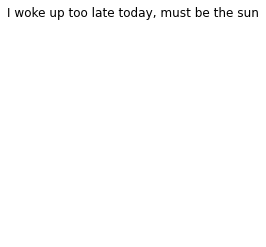

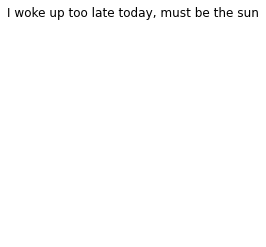

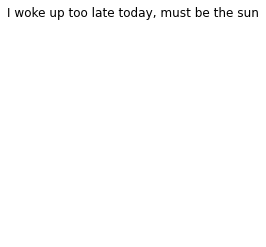

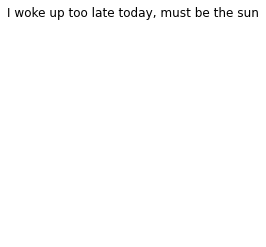

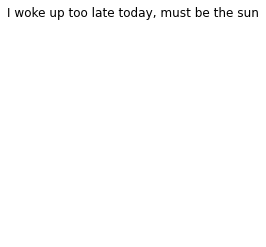

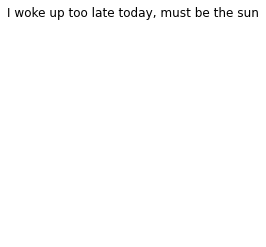

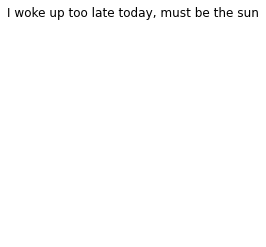

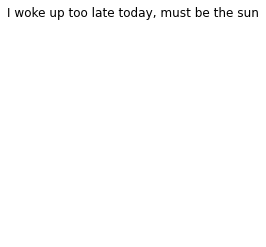

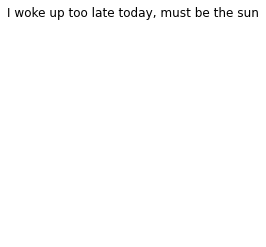

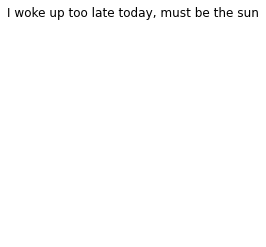

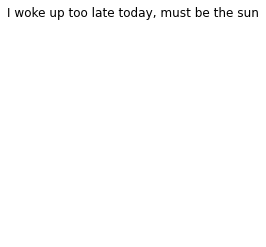

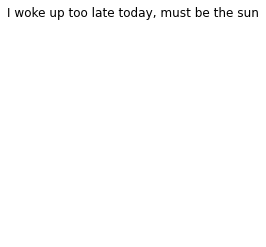

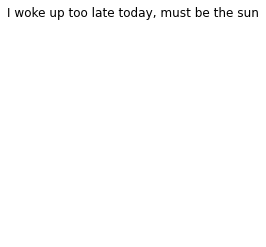

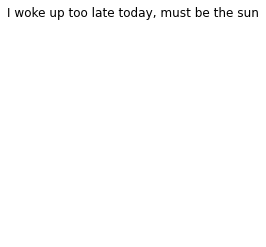

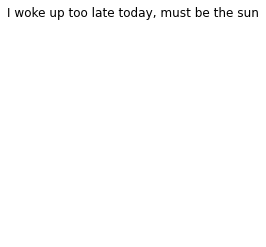

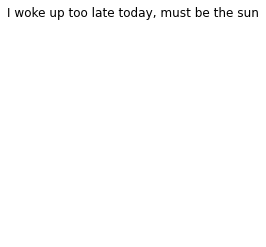

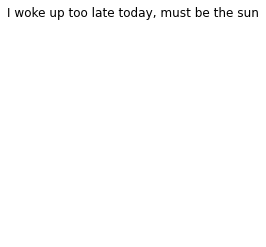

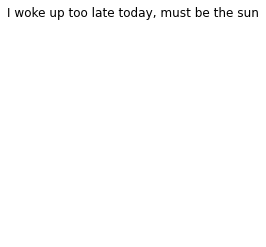

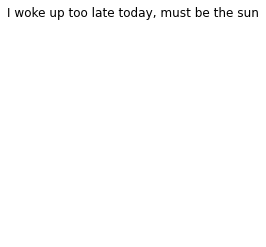

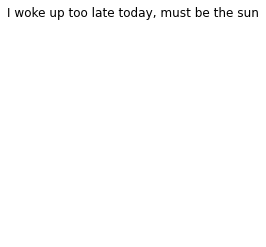

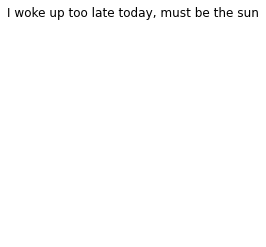

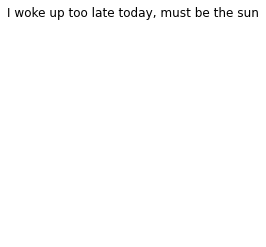

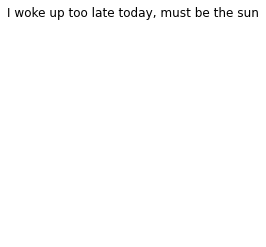

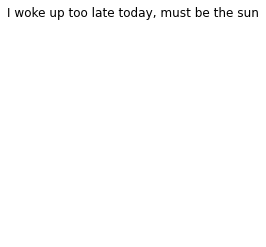

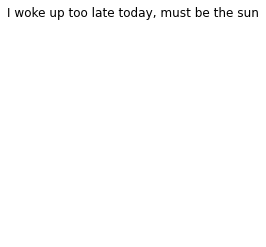

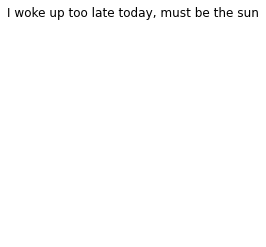

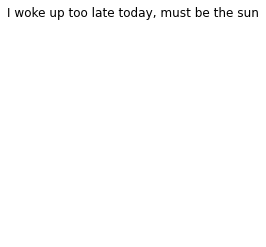

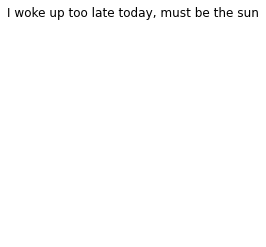

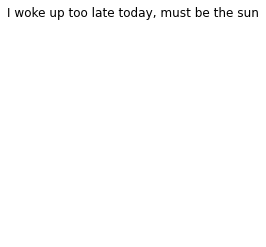

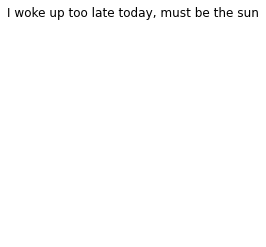

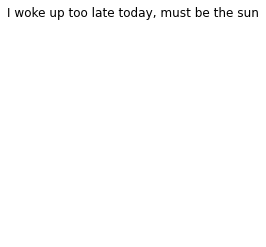

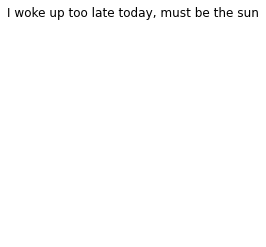

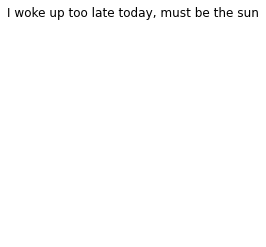

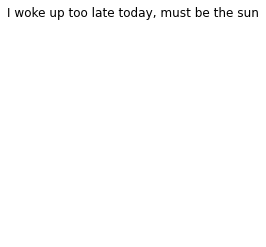

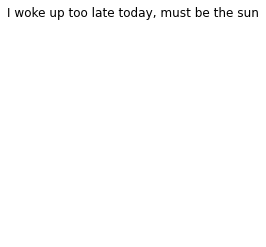

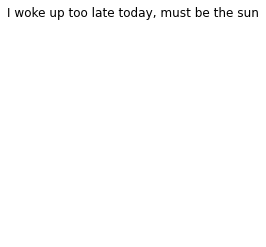

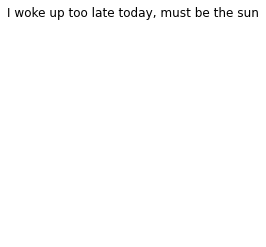

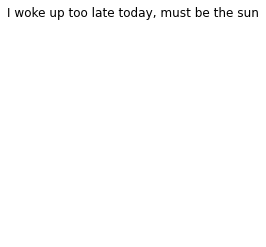

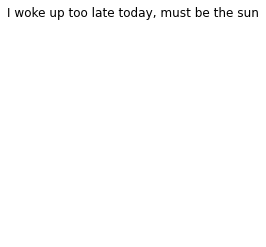

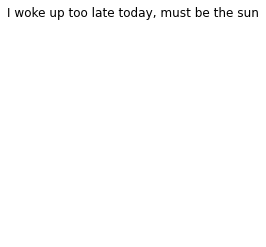

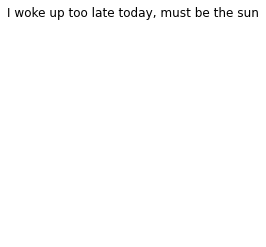

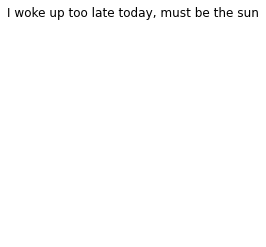

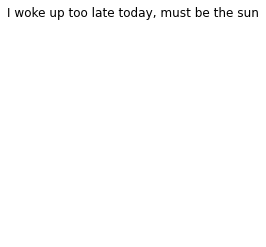

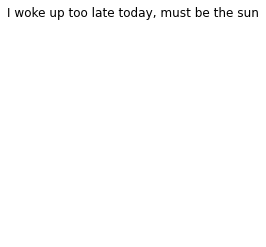

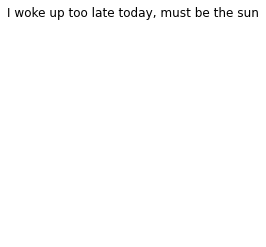

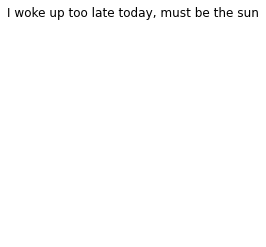

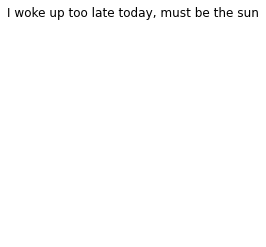

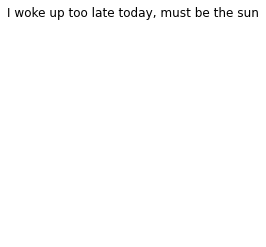

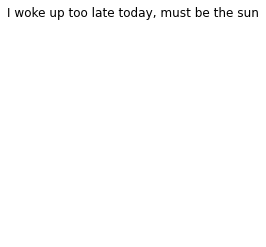

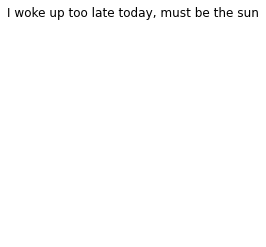

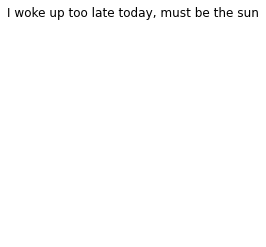

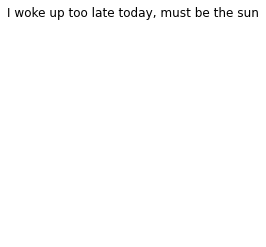

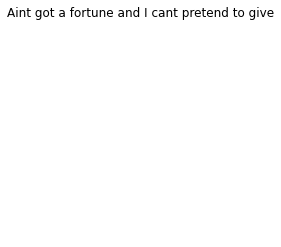

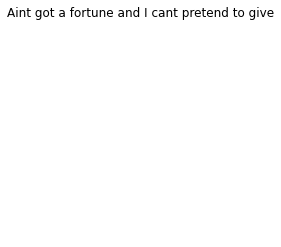

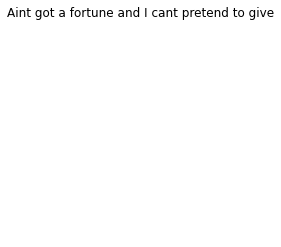

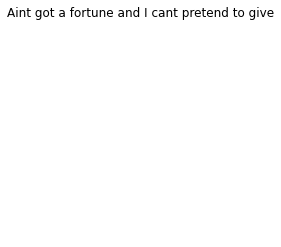

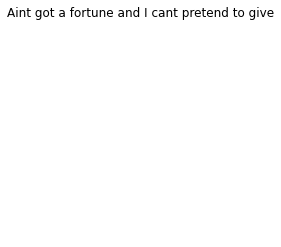

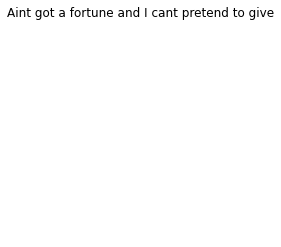

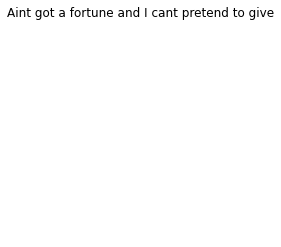

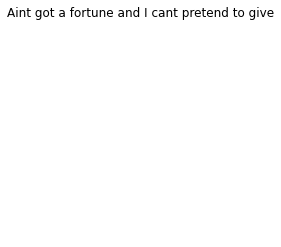

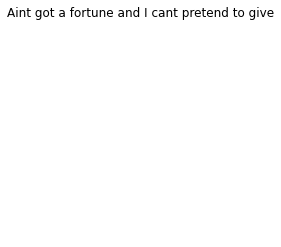

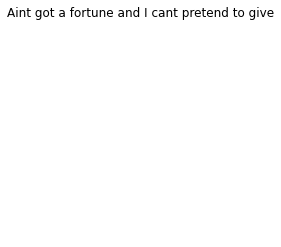

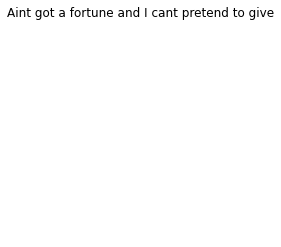

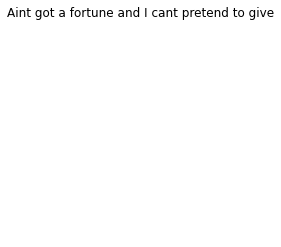

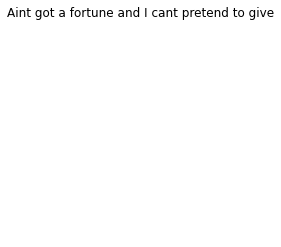

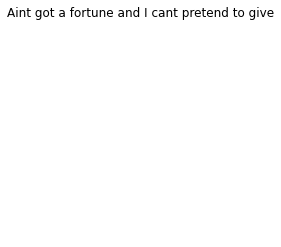

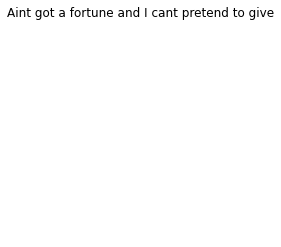

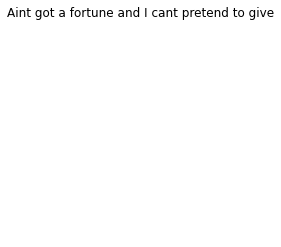

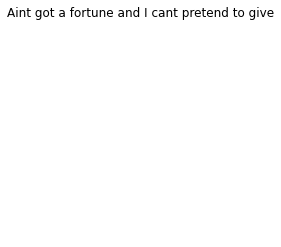

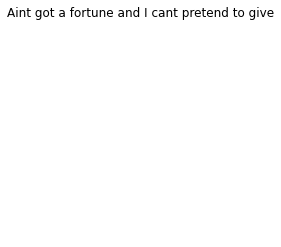

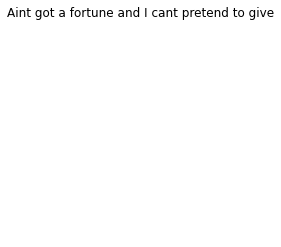

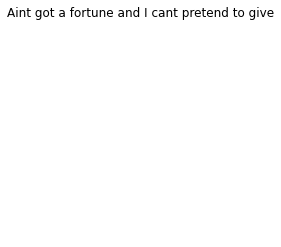

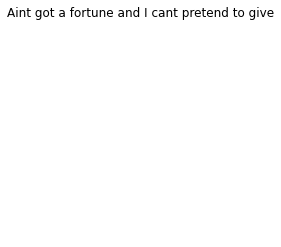

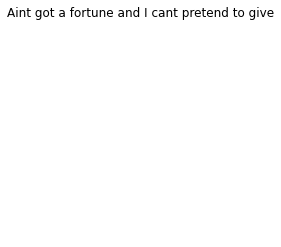

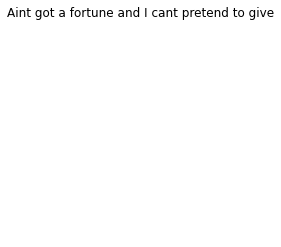

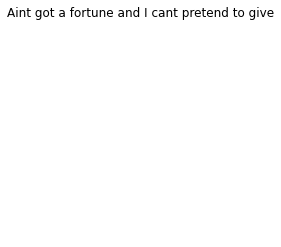

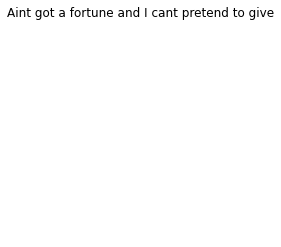

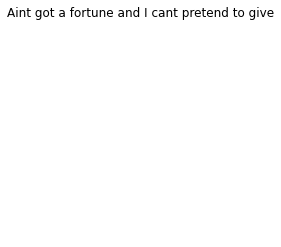

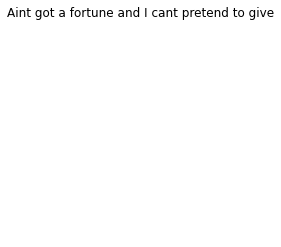

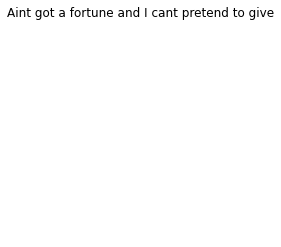

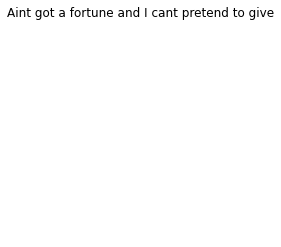

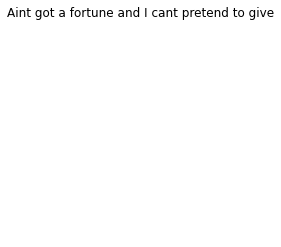

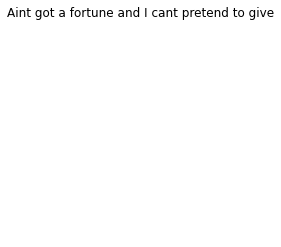

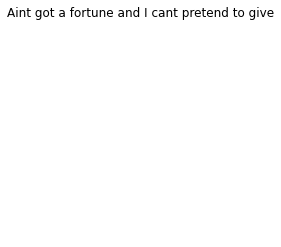

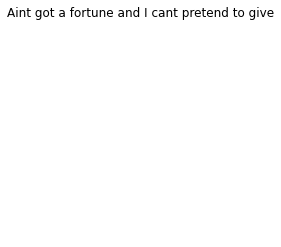

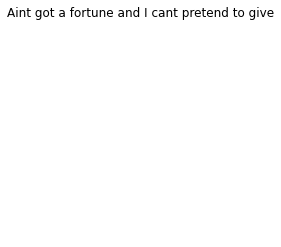

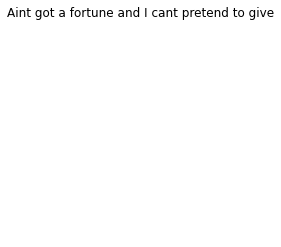

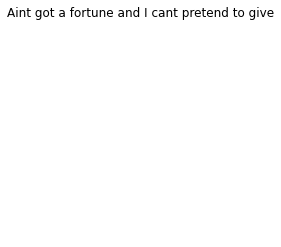

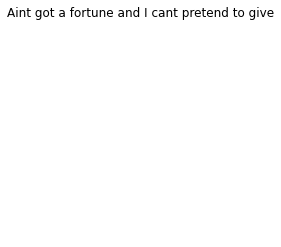

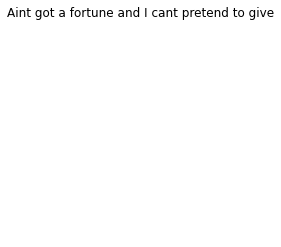

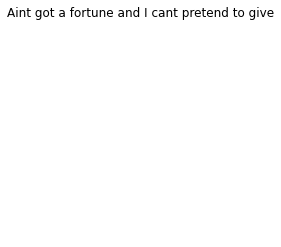

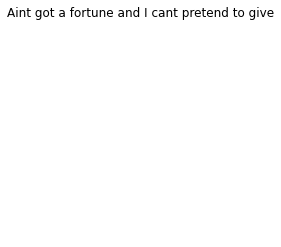

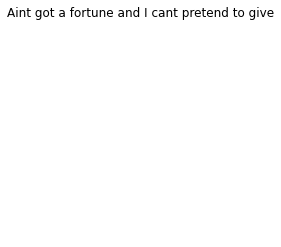

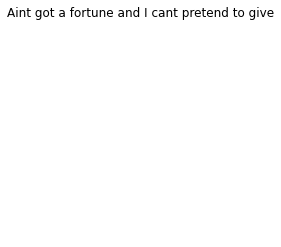

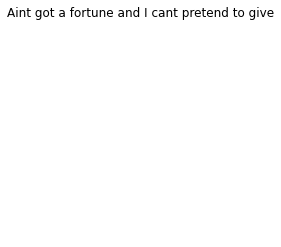

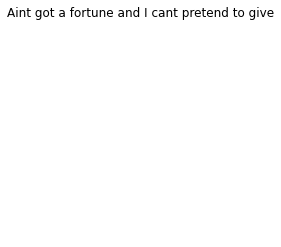

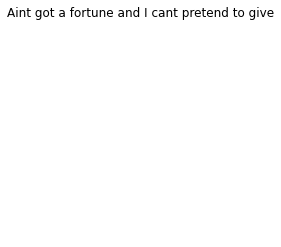

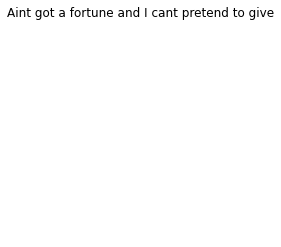

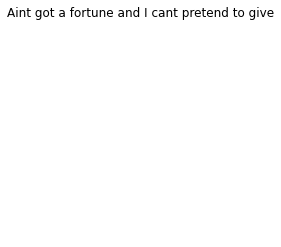

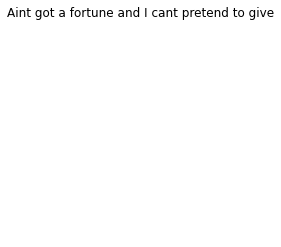

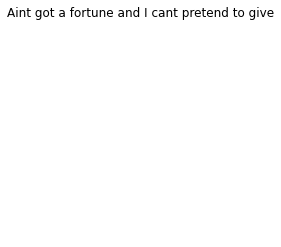

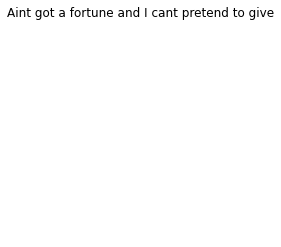

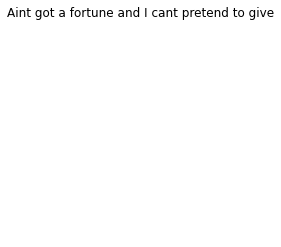

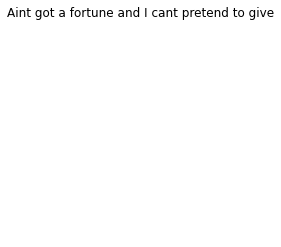

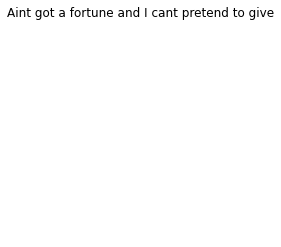

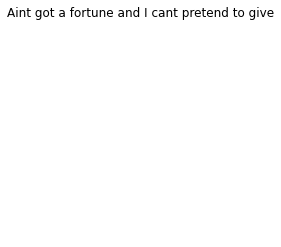

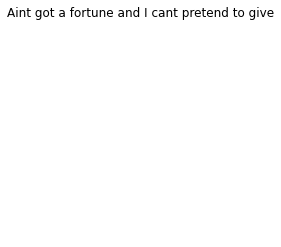

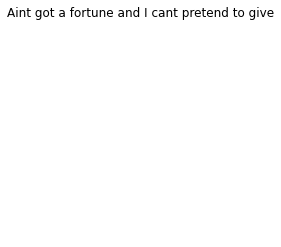

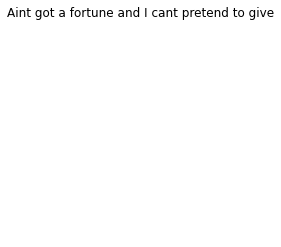

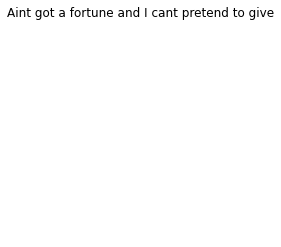

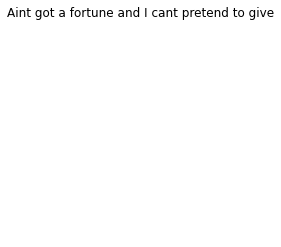

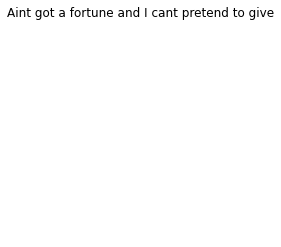

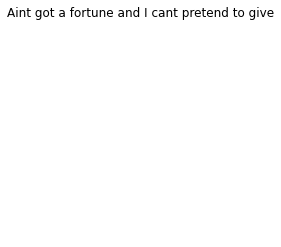

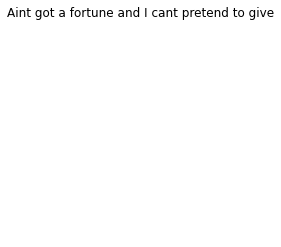

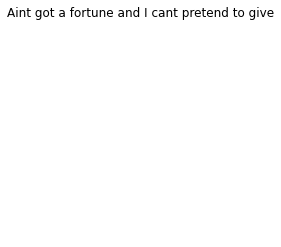

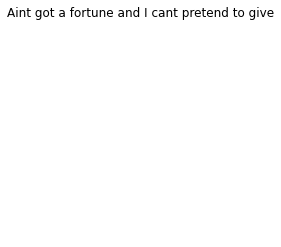

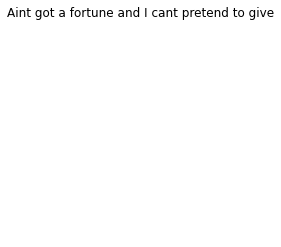

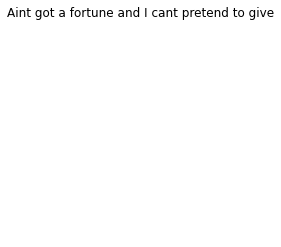

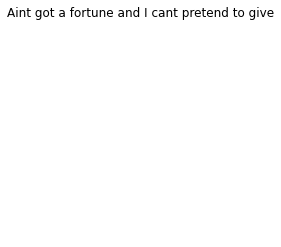

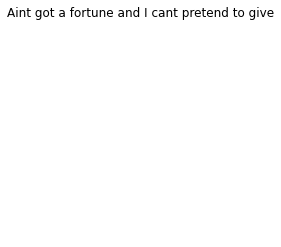

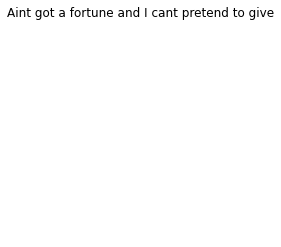

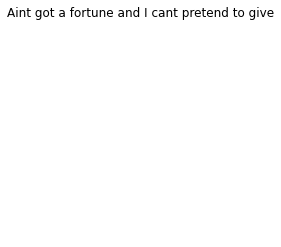

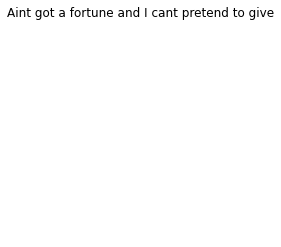

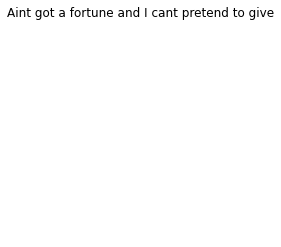

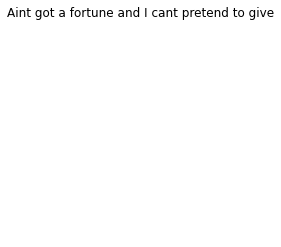

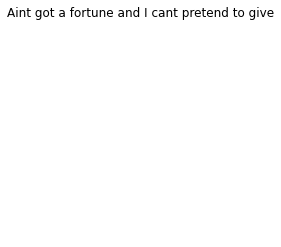

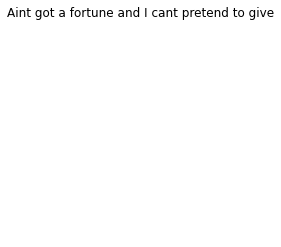

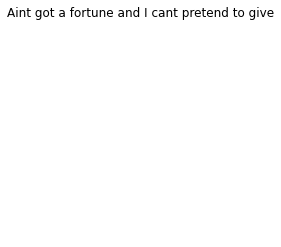

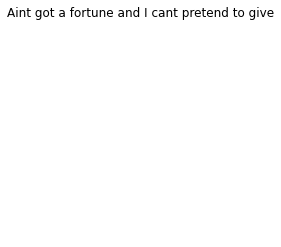

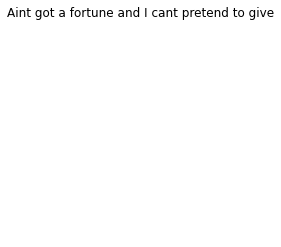

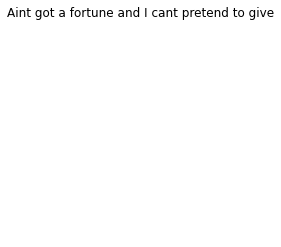

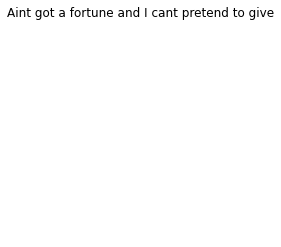

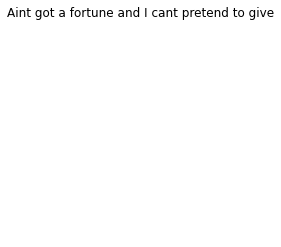

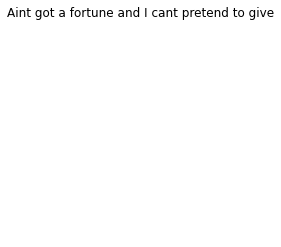

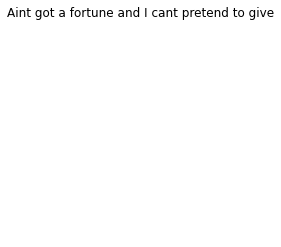

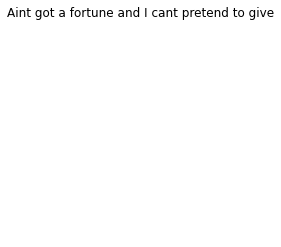

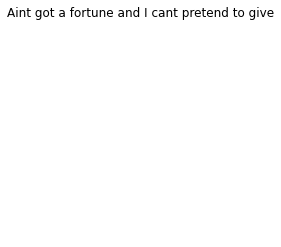

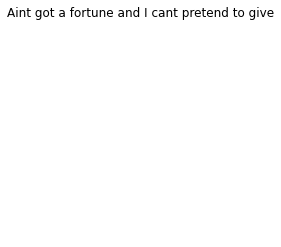

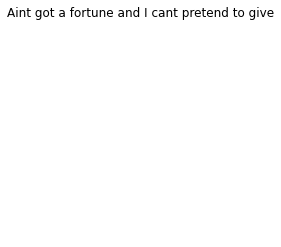

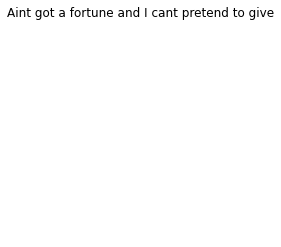

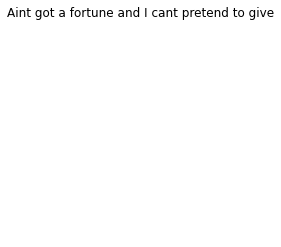

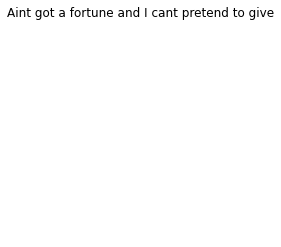

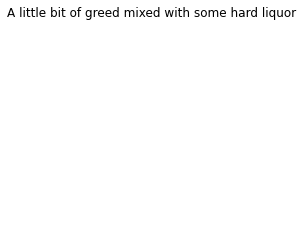

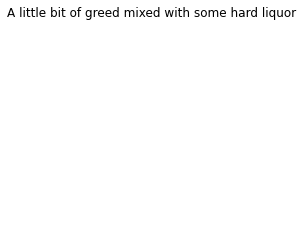

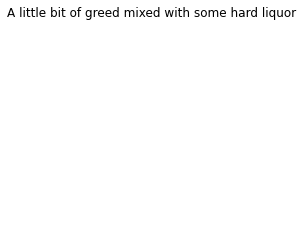

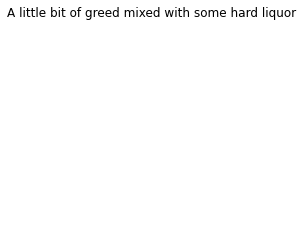

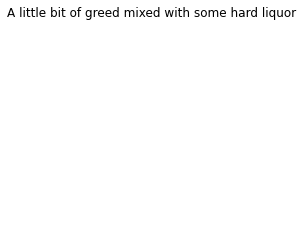

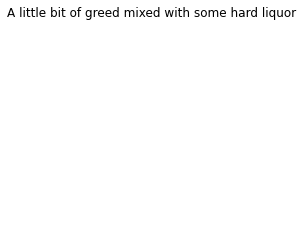

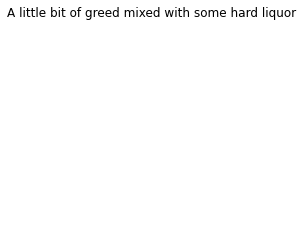

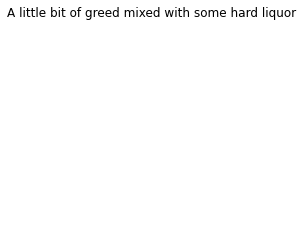

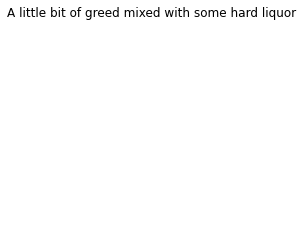

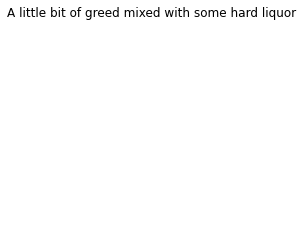

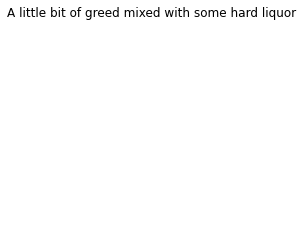

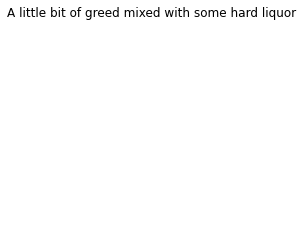

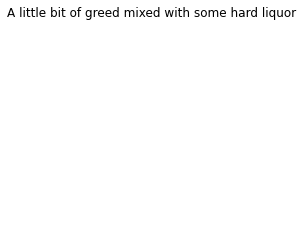

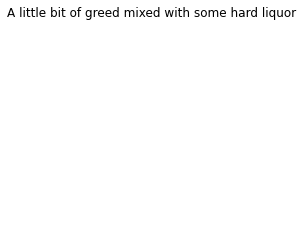

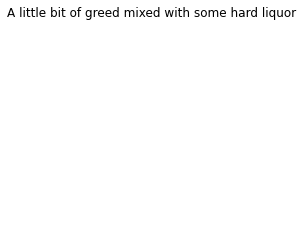

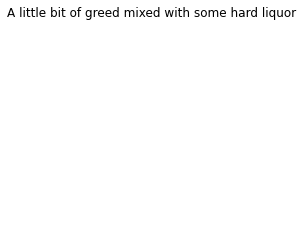

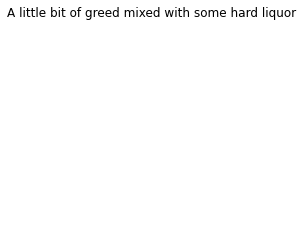

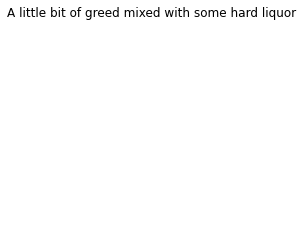

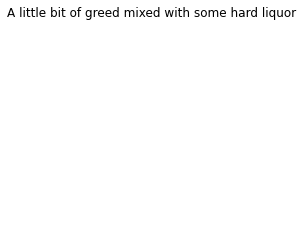

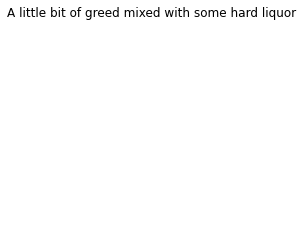

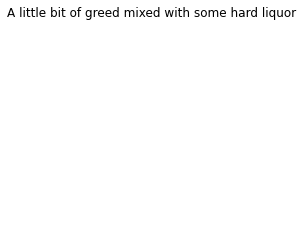

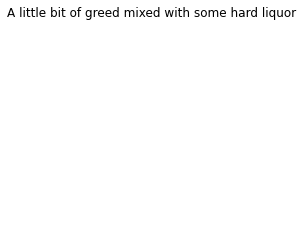

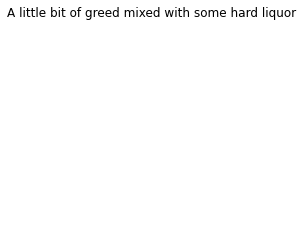

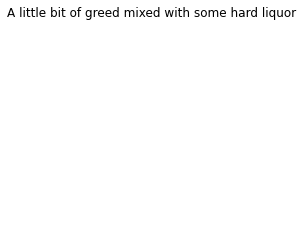

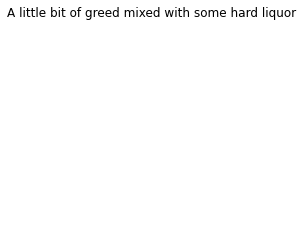

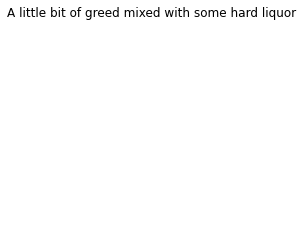

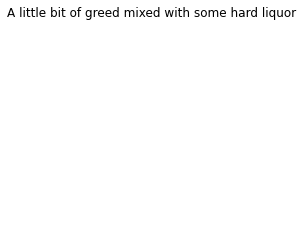

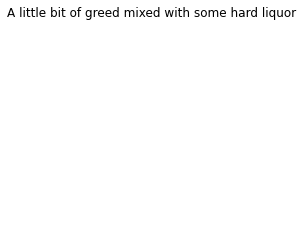

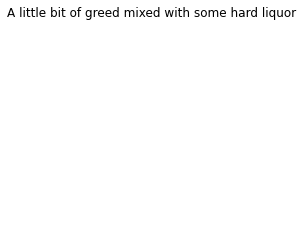

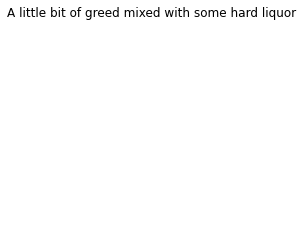

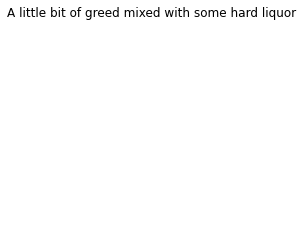

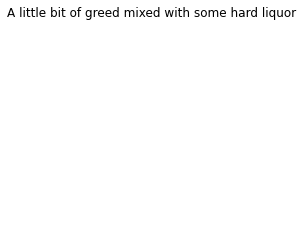

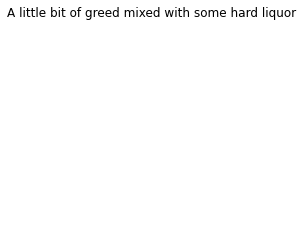

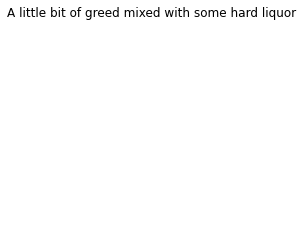

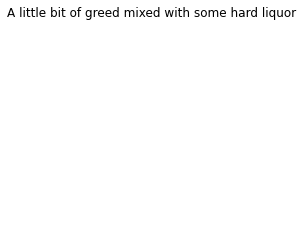

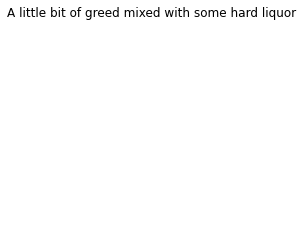

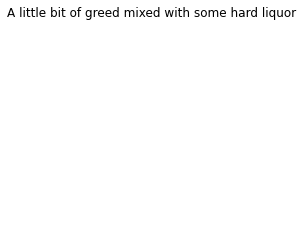

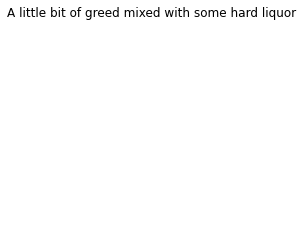

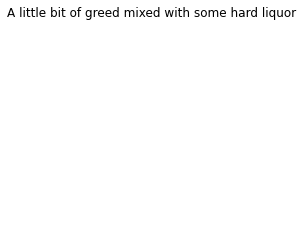

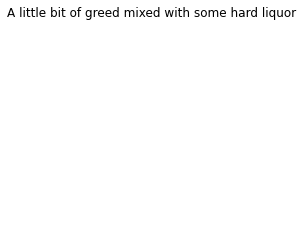

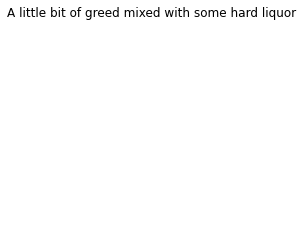

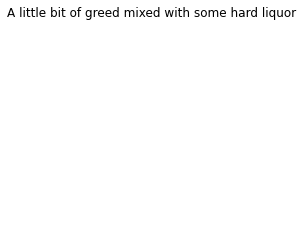

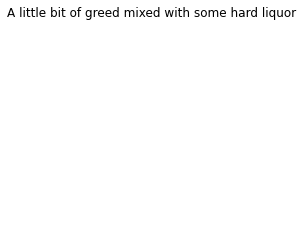

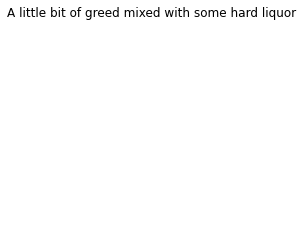

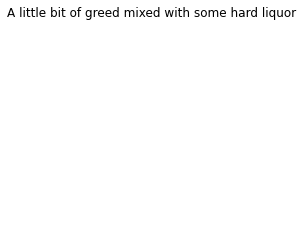

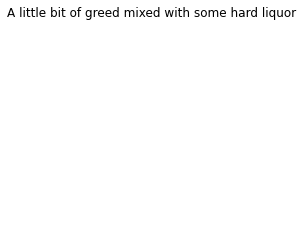

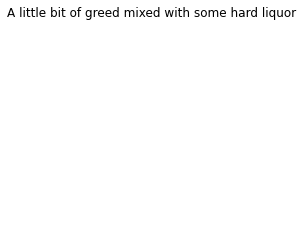

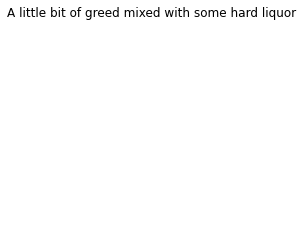

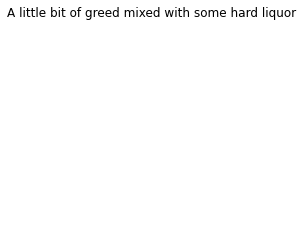

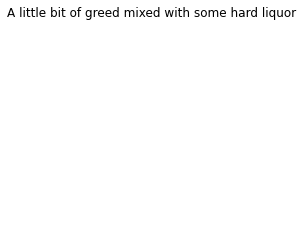

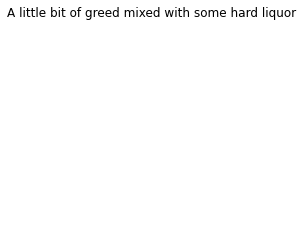

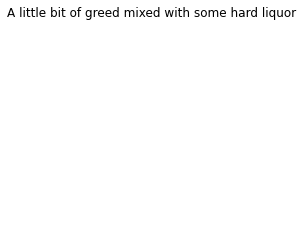

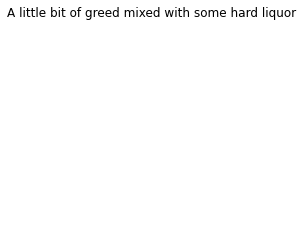

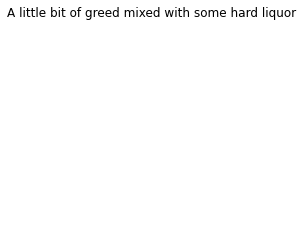

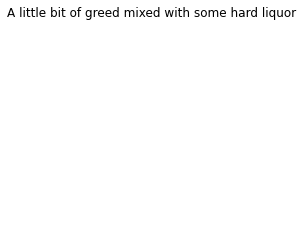

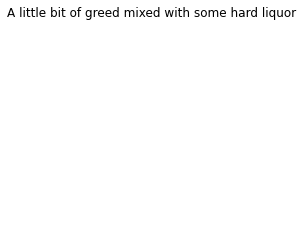

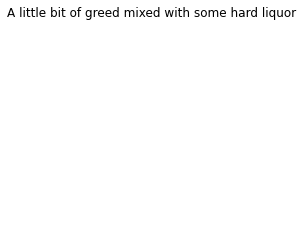

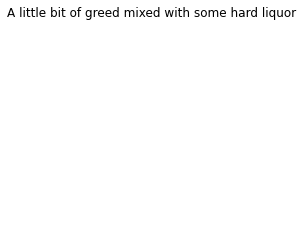

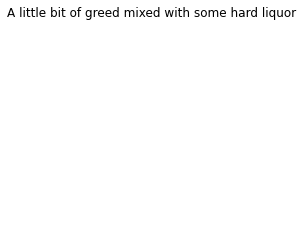

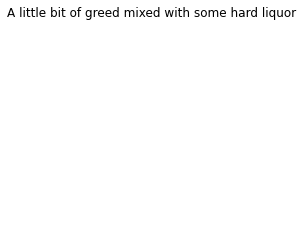

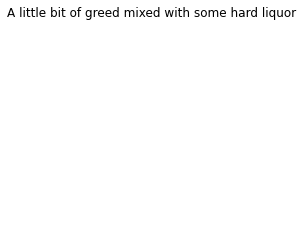

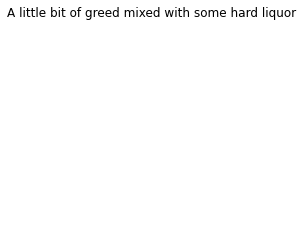

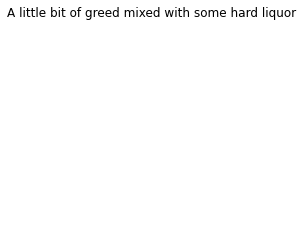

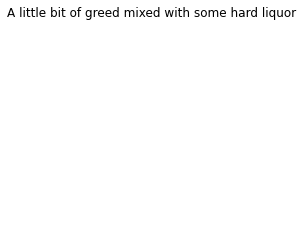

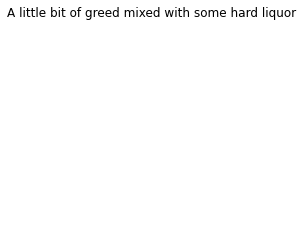

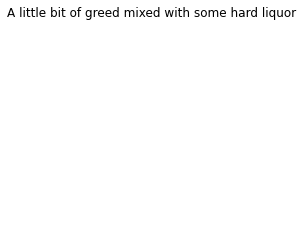

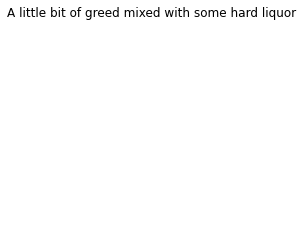

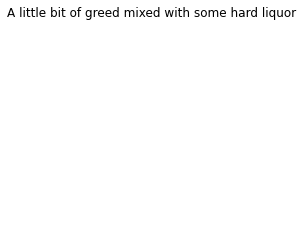

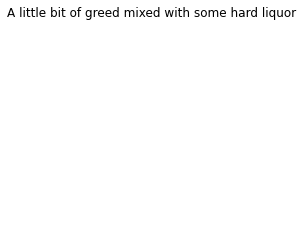

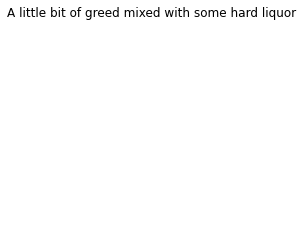

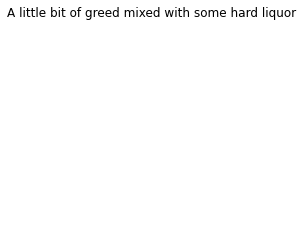

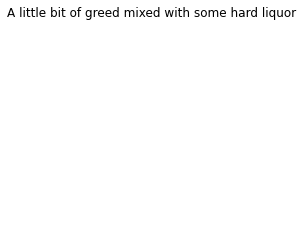

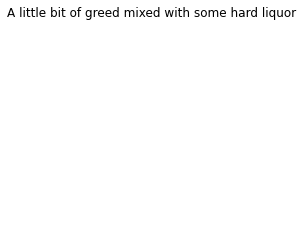

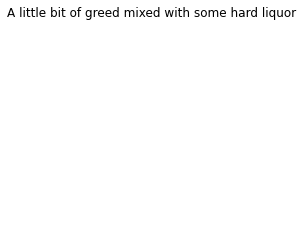

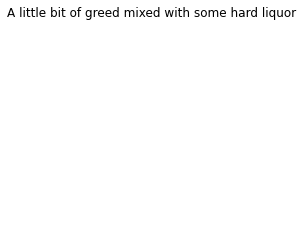

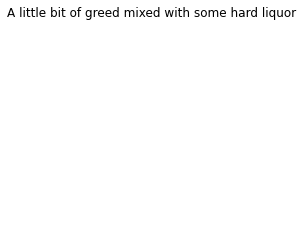

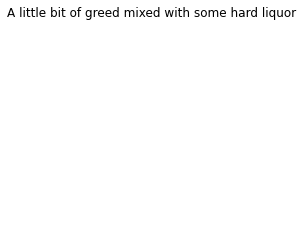

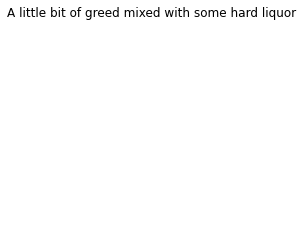

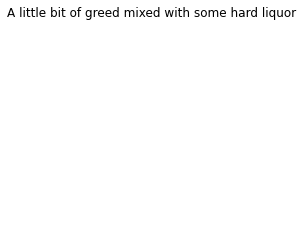

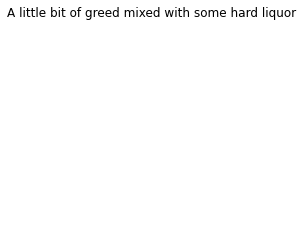

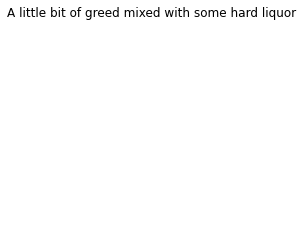

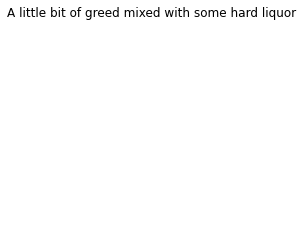

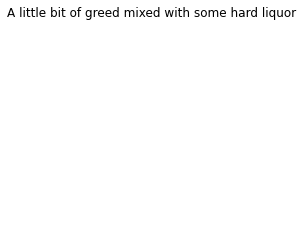

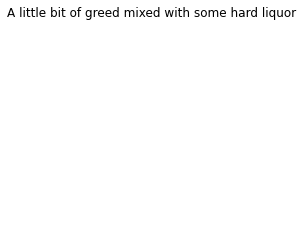

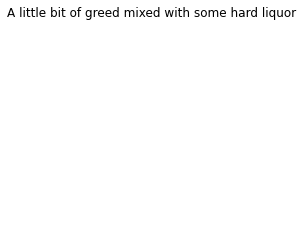

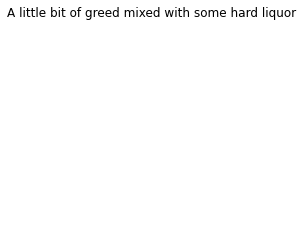

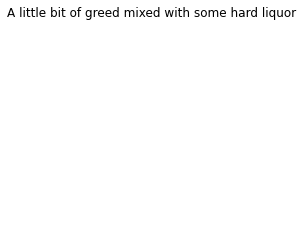

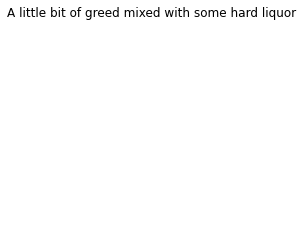

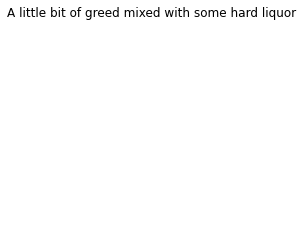

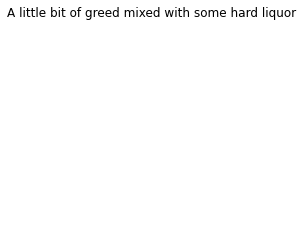

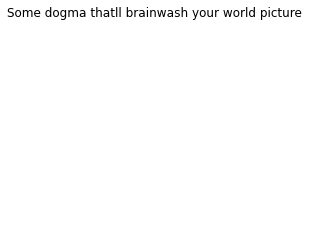

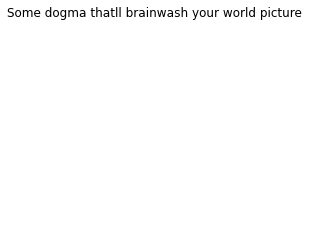

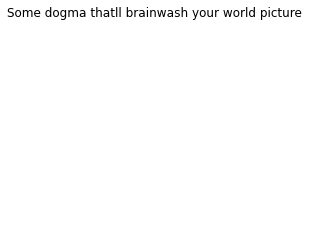

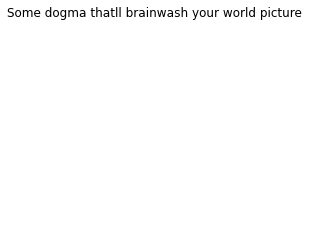

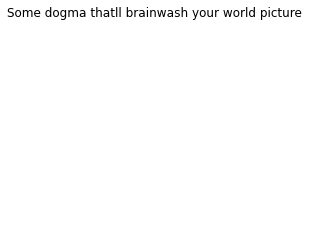

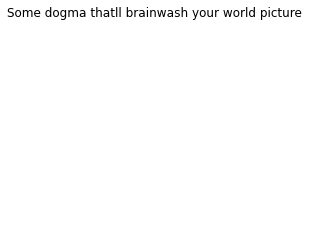

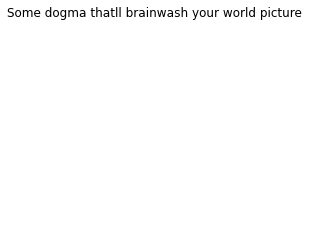

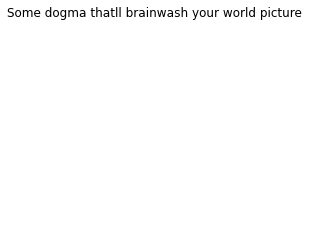

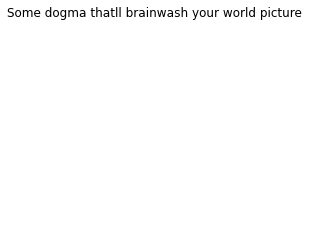

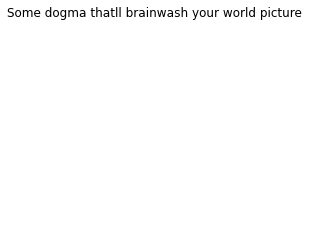

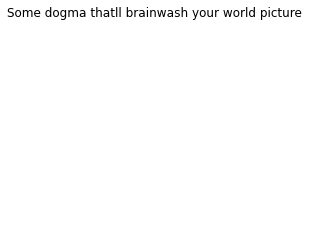

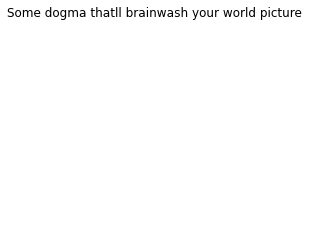

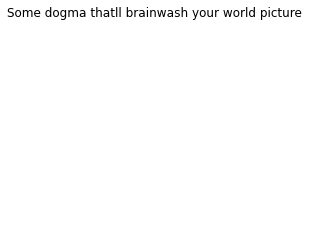

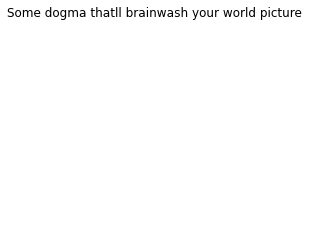

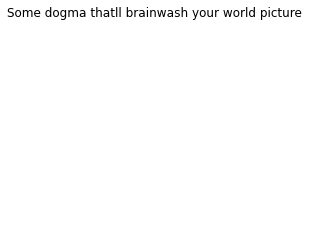

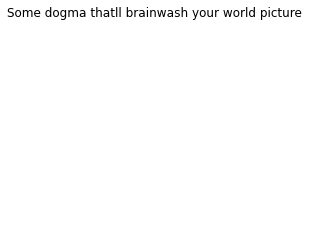

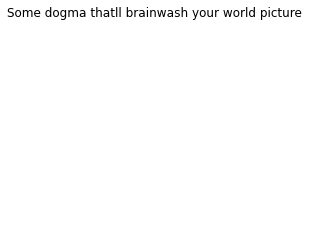

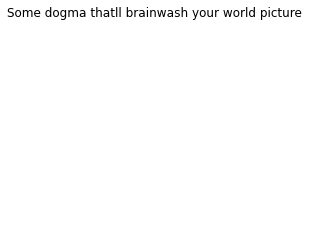

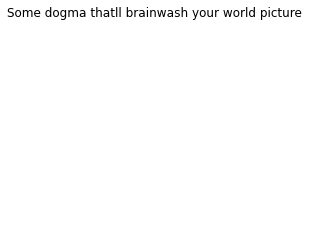

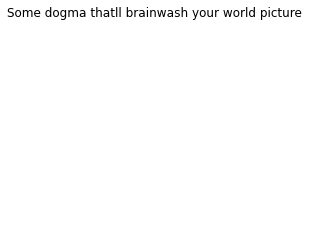

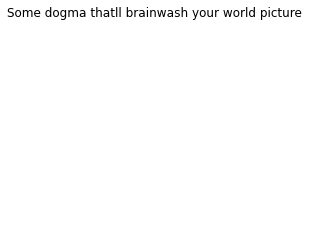

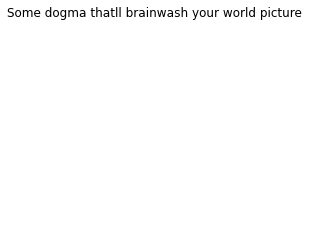

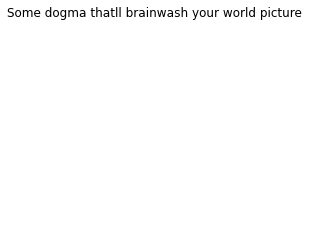

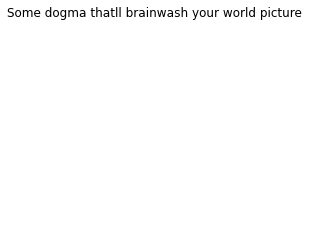

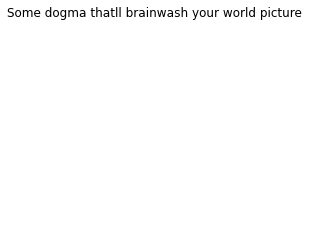

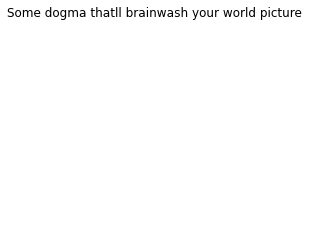

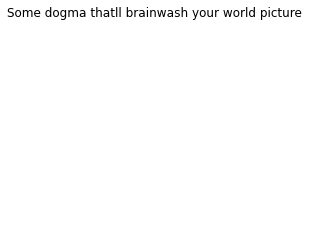

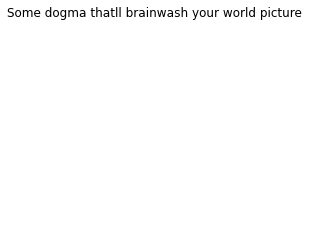

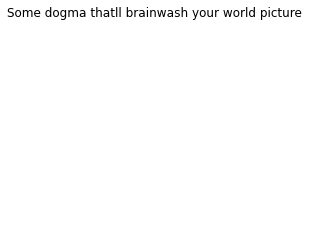

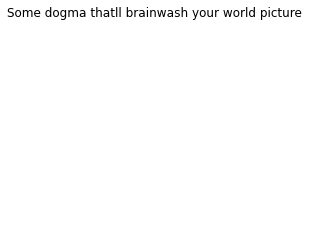

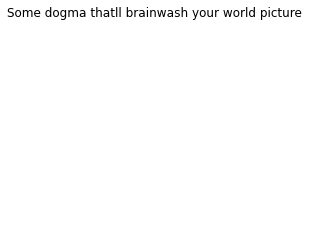

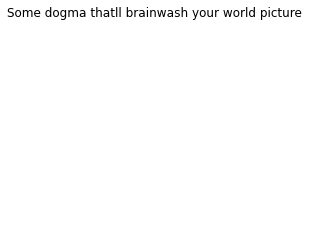

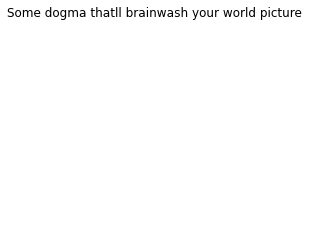

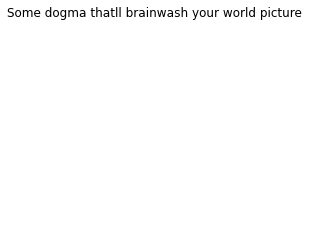

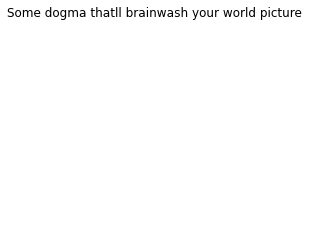

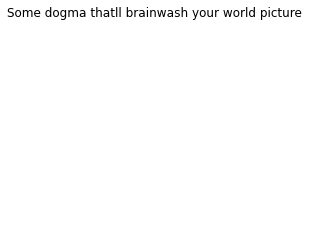

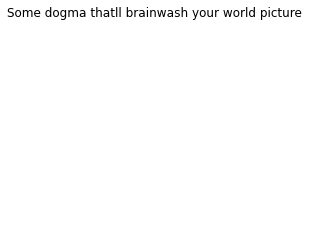

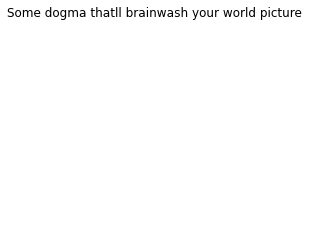

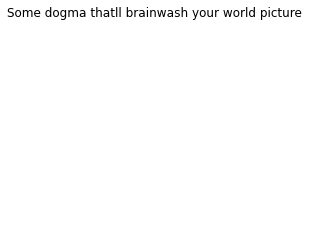

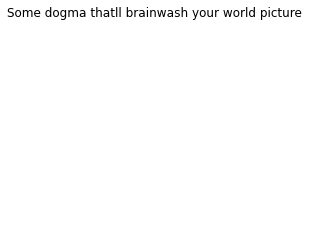

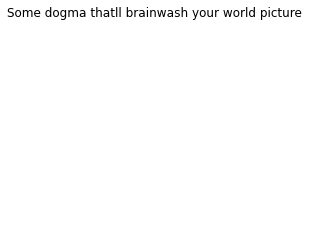

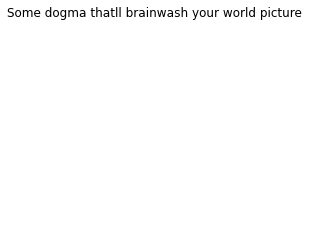

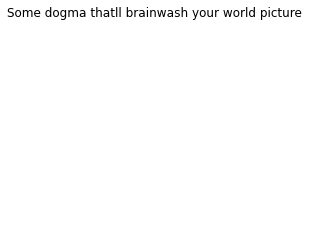

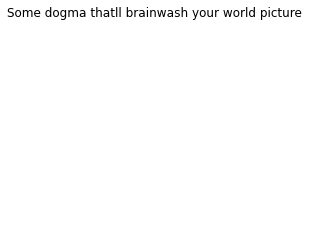

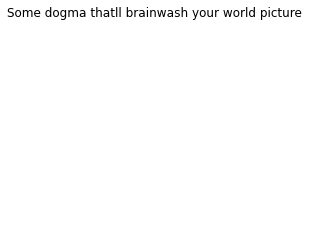

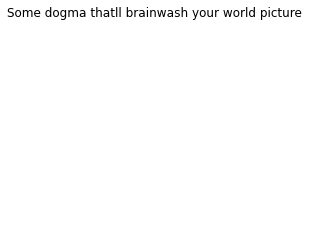

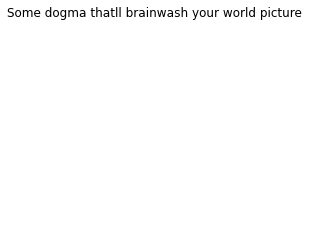

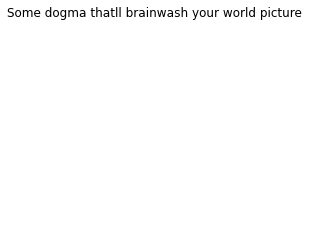

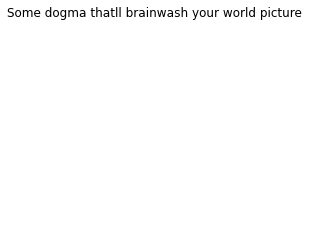

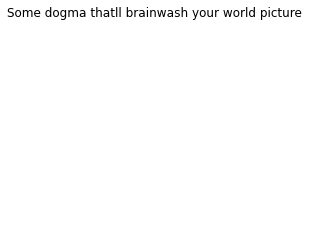

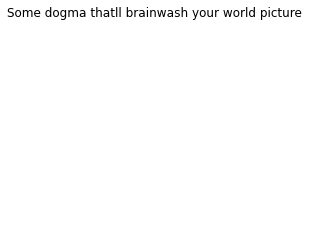

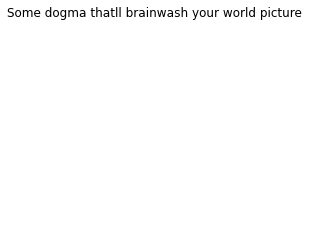

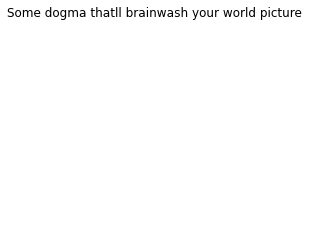

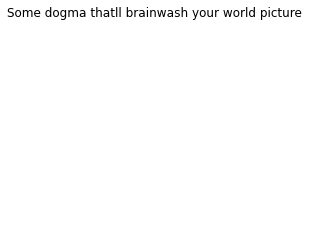

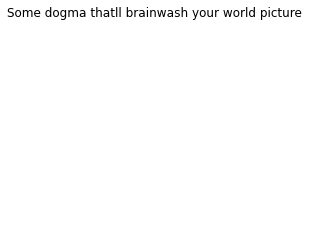

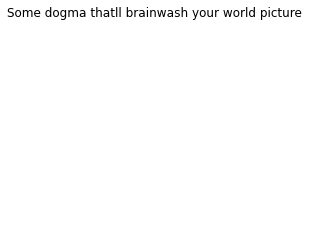

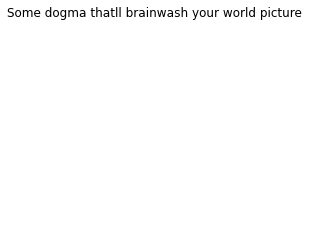

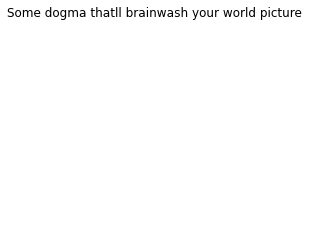

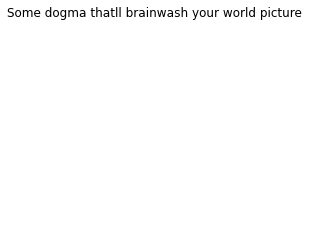

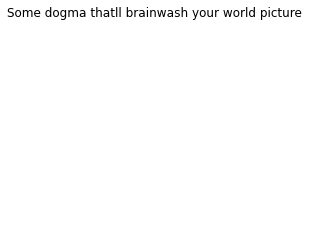

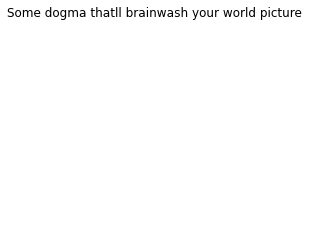

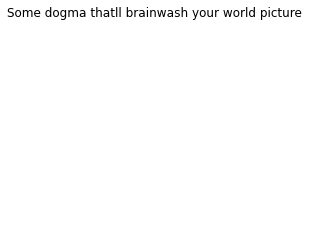

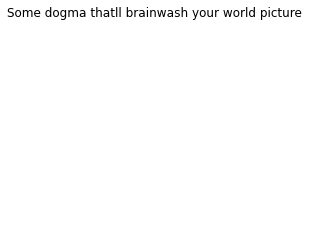

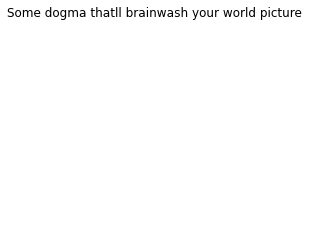

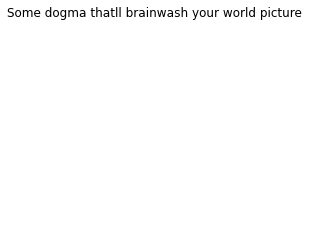

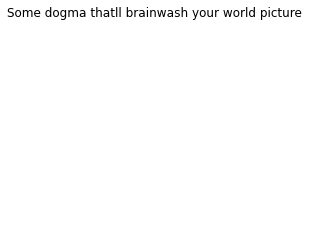

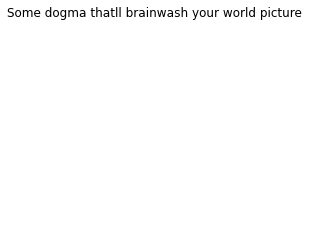

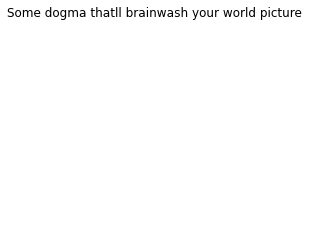

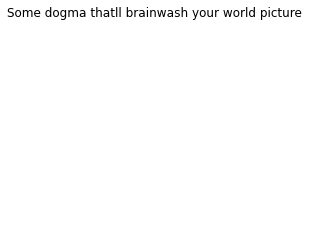

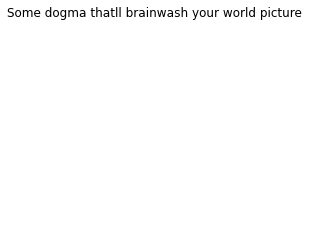

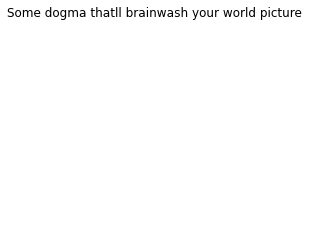

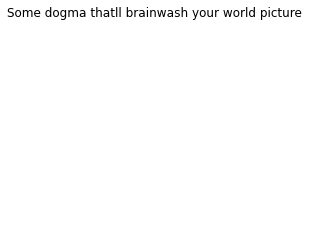

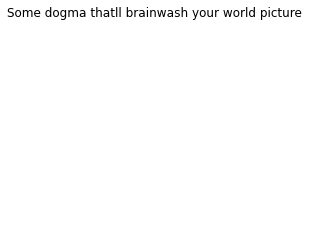

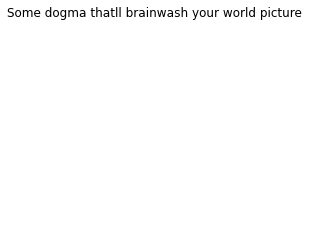

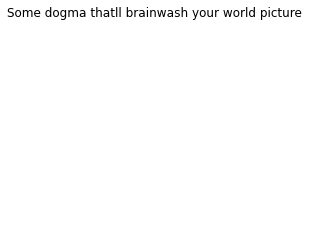

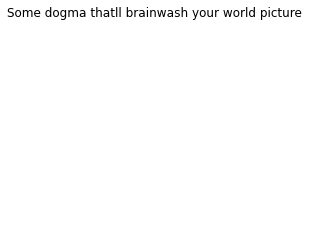

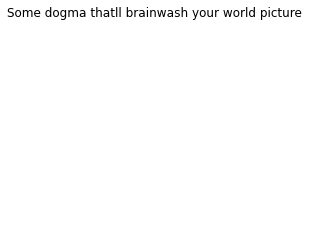

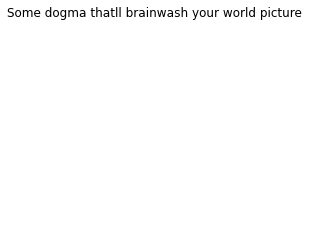

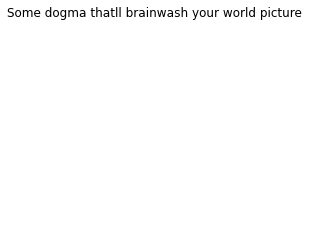

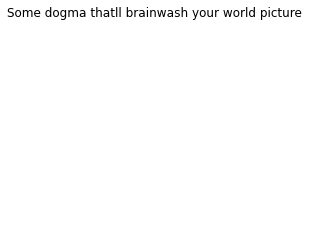

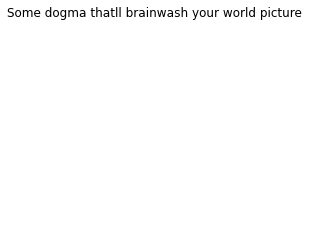

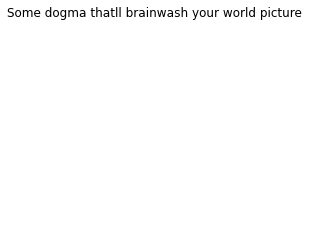

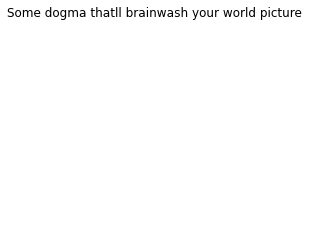

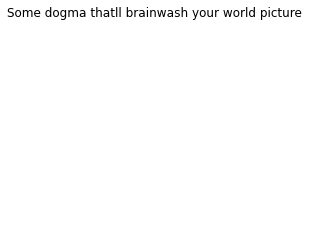

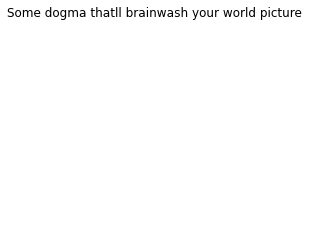

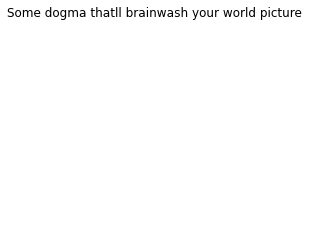

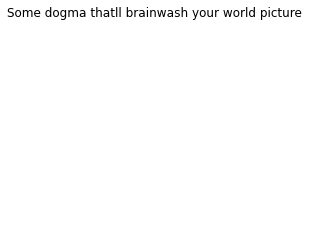

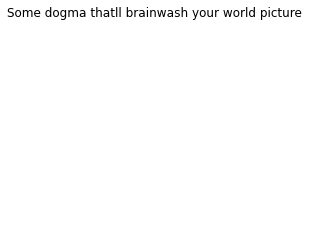

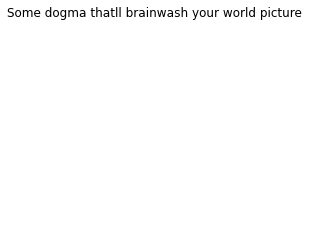

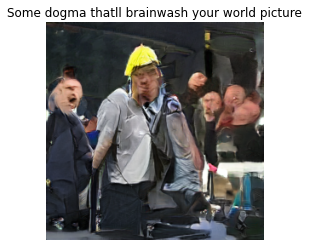

In [206]:
import matplotlib.cm as cm
import matplotlib.animation as animation
plt.rcParams['animation.ffmpeg_path']="../10615/ffmpeg-2022-04-28-git-ec07b15477-essentials_build/ffmpeg-2022-04-28-git-ec07b15477-essentials_build/bin/ffmpeg.exe"

img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure()
for i in range(len(final_movie)):
    plt.figure()
    plt.axis('off')
    plt.title(titles[int(i/90)])
    frames.append([plt.imshow(final_movie[i], cmap=cm.Greys_r,animated=True)])
#     plt.show()
#     plt.clf()
ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
# ani = animation.Animation(fig, frames)
ani.save('eminem_titles.mp4', fps=30)
plt.show()

In [33]:
!pip install opencv-python

In [40]:
import cv2
import glob

out = cv2.VideoWriter("film_stich.avi", cv2.VideoWriter_fourcc(*'DIVX'), 15, (movie[0].shape[0], movie[0].shape[1]) )


In [41]:
for i in range(len(final_movie)):
    img = cv2.cvtColor(final_movie[i], cv2.COLOR_RGB2BGR)
    out.write(img)
out.release()